In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [ ]:
print('Training Data: ', train_images.shape, train_labels.shape)
print('Testing Data: ', test_images.shape, test_labels.shape)

Training Data:  (60000, 28, 28) (60000,)
Testing Data:  (10000, 28, 28) (10000,)


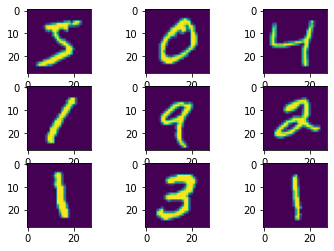

In [ ]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(train_images[i])

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
mod = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = mod.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3016 - acc: 0.9150
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1450 - acc: 0.9582
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1040 - acc: 0.9690
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0830 - acc: 0.9753
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0680 - acc: 0.9797


In [ ]:
mod.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.0914 - acc: 0.9719


[0.09135086834430695, 0.9718999862670898]

Text(0.5, 1.0, 'Training Loss')

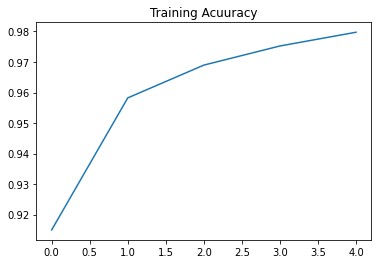

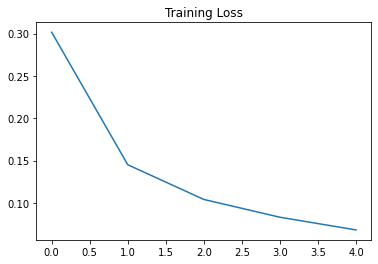

In [ ]:
accuracy = history.history['acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy)
plt.title('Training Acuuracy')

plt.figure()

loss = history.history['loss']
plt.plot(epochs, loss)
plt.title('Training Loss')

In [ ]:
import numpy as np
pred = mod.predict(test_images)
pred = [np.argmax(x) for x in pred]

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
classes = ['0','1','2','3','4','5','6','7','8','9']
con_mat=confusion_matrix(test_labels,pred)
print(con_mat)

[[ 967    0    1    1    2    1    4    2    1    1]
 [   0 1127    4    0    0    1    2    0    1    0]
 [   6    6  991    3    2    0    3    7   14    0]
 [   0    2    6  973    0    5    0    9    7    8]
 [   2    0    3    0  963    0    4    3    1    6]
 [   3    1    0   11    2  858    8    1    6    2]
 [   7    3    0    1    5    3  939    0    0    0]
 [   0    5    6    1    4    0    0 1005    1    6]
 [   4    2    3    3   10    5    6    6  931    4]
 [   2    6    0    5   19    1    1    7    3  965]]


In [ ]:
mod.save('model.h5')

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile result.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True) 

def load_model():
  mod = tf.keras.models.load_model('/content/model.h5')
  return mod

mod = load_model()

st.write("""
    MNIST Model
    """
) #title of webpage

file = st.file_uploader('Please upload an image', type=['jpg','png'])

import cv2
import PIL
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data, model):
  size = (28,28)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...]  
  prediction = mod.predict(img_reshape)

  return prediction

if file is None:
  st.text('Please upload an image')
else:
  image = Image.open(file)
  st.image(image, use_column_width=True) 
  predictions = import_and_predict(image, mod) 
  class_names = ['0','1','2','3','4','5','6','7','8','9']
  string = class_names[np.argmax(predictions)]
  st.success(string) 

Overwriting result.py


In [ ]:
!ngrok authtoken 1giXrhzoorZx3hNFxa5g77DBUlM_55mZXCznAWCo1eroZ57By

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run result.py & 

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
link = ngrok.connect(port=8501) 
link

'http://922e86c7ba43.ngrok.io'